In [12]:
import pandas as pd
import os
import json
import random
random.seed(42)

In [8]:
# datasets = ["flancot_filtered_15k", "alpaca-cleaned"]
datasets = ["alpaca-cleaned"]
# datasets = ["flancot_filtered_15k"]

models = [
    "gpt-3.5-turbo",
    "gpt-4-turbo",
    "c4ai-command-r-plus",
    "c4ai-command-r-v01",
    # "Meta-Llama-3-8B-Instruct",
    "Meta-Llama-3-70B-Instruct",
]

suffix = "generate_instruct-refine"
results = []

for dataset in datasets:
    for model in models:
        if "flancot" in dataset:
            dataset_name = "flancot"
        else:
            dataset_name = "alpaca"

        print(f"Processing {dataset} {model}")
        file = f"{dataset_name}/{dataset}-{model}-{suffix}.jsonl"
        if not os.path.exists(file):
            print(f"Skipping {file}")
            continue
        with open(file) as f:
            lines = f.readlines()
            for line in lines:
                data = json.loads(line)
                if data['idx'] >= 100:
                    continue
                data["dataset"] = dataset
                data["model"] = model
                results.append(data)

df = pd.DataFrame(results)
df

Processing alpaca-cleaned gpt-3.5-turbo
Processing alpaca-cleaned gpt-4-turbo
Processing alpaca-cleaned c4ai-command-r-plus
Processing alpaca-cleaned c4ai-command-r-v01
Processing alpaca-cleaned Meta-Llama-3-70B-Instruct


,idx,input,instruction,completions,option,new_instruction,dataset,model,extracted_instruction,refine_instruction,extracted_refined_instruction
0,22,,"Determine which of the two words ""penchant"" an...","For the given instruction, a suitable adaptati...",D,"Determine which of the two words ""penchant"" an...",alpaca-cleaned,gpt-3.5-turbo,NaN,NaN,NaN
1,43,Input: 'The sun was a golden coin in the sky.',Rewrite the sentence to reveal the metaphor.,"For the given instruction, a suitable adaptati...",D,Rewrite the sentence to reveal the metaphor.,alpaca-cleaned,gpt-3.5-turbo,NaN,NaN,NaN
2,48,,Compare and contrast the US Constitution and t...,"For the given instruction, a suitable adaptati...",D,Compare and contrast the US Constitution and t...,alpaca-cleaned,gpt-3.5-turbo,NaN,NaN,NaN
3,67,,What is the y-intercept of the line x - 2y = 5?,"For the given instruction, a suitable adaptati...",D,What is the y-intercept of the line x - 2y = 5?,alpaca-cleaned,gpt-3.5-turbo,NaN,NaN,NaN
4,73,,Classify the following sentence as true or fal...,"For the given instruction, a suitable adaptati...",D,Classify the following sentence as true or fal...,alpaca-cleaned,gpt-3.5-turbo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,95,"Input: 'The last paragraph of the story reads,...",Determine the characters’ psychological states...,,D,Determine the characters’ psychological states...,alpaca-cleaned,Meta-Llama-3-70B-Instruct,NaN,NaN,NaN
496,96,Input: 'The apple is a popular fruit.',Change the statement into a rhetorical questio...,,D,Change the statement into a rhetorical questio...,alpaca-cleaned,Meta-Llama-3-70B-Instruct,NaN,NaN,NaN
497,97,,List 10 synonyms for 'sad'.,,D,List 10 synonyms for 'sad'.,alpaca-cleaned,Meta-Llama-3-70B-Instruct,NaN,NaN,NaN
498,98,,Explain why an organization might use open sou...,,D,Explain why an organization might use open sou...,alpaca-cleaned,Meta-Llama-3-70B-Instruct,NaN,NaN,NaN


In [9]:
# drop columns [input, dataset], groupby idx column and sample 30 unique idx
sampled_df = df.drop(columns=["dataset"])
# select unique 30 idx 
selected_idx = sampled_df["idx"].unique()
selected_idx = random.sample(list(selected_idx), 20)

sampled_df = sampled_df[sampled_df["idx"].isin(selected_idx)]
# set the idx column as categorical
sampled_df["idx"] = pd.Categorical(sampled_df["idx"])
# group by idx into multirow
sampled_df = sampled_df.set_index(["idx", "model"])
# sort by idx
sampled_df = sampled_df.sort_index()
# drop new_instruction column
sampled_df = sampled_df.drop(columns=["new_instruction"])
# swap the column order into ['instruction', 'option', 'completions', 'extracted_instruction', 'refine_instruction', 'extracted_refine_instruction']
sampled_df = sampled_df[['instruction', 'input', 'option', 'completions', 'extracted_instruction', 'refine_instruction', 'extracted_refined_instruction']]
sampled_df
# save to csv
# sampled_df.to_csv("sampled_results.csv")

instruction  \
idx model                                                                          
0   Meta-Llama-3-70B-Instruct  Construct a truth table for the given expression.   
    c4ai-command-r-plus        Construct a truth table for the given expression.   
    c4ai-command-r-v01         Construct a truth table for the given expression.   
    gpt-3.5-turbo              Construct a truth table for the given expression.   
    gpt-4-turbo                Construct a truth table for the given expression.   
...                                                                          ...   
98  Meta-Llama-3-70B-Instruct  Explain why an organization might use open sou...   
    c4ai-command-r-plus        Explain why an organization might use open sou...   
    c4ai-command-r-v01         Explain why an organization might use open sou...   
    gpt-3.5-turbo              Explain why an organization might use open sou...   
    gpt-4-turbo                Explain why an organization might use open sou...   

                                                       input option  \
idx model                                                             
0   Meta-Llama-3-70B-Instruct  Input: '(~P -> Q) v (R -> S)'      D   
    c4ai-command-r-plus        Input: '(~P -> Q) v (R -> S)'      D   
    c4ai-command-r-v01         Input: '(~P -> Q) v (R -> S)'      A   
    gpt-3.5-turbo              Input: '(~P -> Q) v (R -> S)'      B   
    gpt-4-turbo                Input: '(~P -> Q) v (R -> S)'      C   
...                                                      ...    ...   
98  Meta-Llama-3-70B-Instruct                                     D   
    c4ai-command-r-plus                                           C   
    c4ai-command-r-v01                                            C   
    gpt-3.5-turbo                                                 C   
    gpt-4-turbo                                                   C   

                                                                     completions  \
idx model                                                                          
0   Meta-Llama-3-70B-Instruct                                                      
    c4ai-command-r-plus        For the given instruction, a suitable adaptati...   
    c4ai-command-r-v01         For the given instruction, the suitable adapta...   
    gpt-3.5-turbo              For the given instruction, a suitable adaptati...   
    gpt-4-turbo                For the given instruction, a suitable adaptati...   
...                                                                          ...   
98  Meta-Llama-3-70B-Instruct                                                      
    c4ai-command-r-plus        For the given instruction, a suitable adaptati...   
    c4ai-command-r-v01         For the given instruction, the suitable adapta...   
    gpt-3.5-turbo              For the given instruction, a suitable adaptati...   
    gpt-4-turbo                For the given instruction, a suitable adaptati...   

                                                           extracted_instruction  \
idx model                                                                          
0   Meta-Llama-3-70B-Instruct                                                NaN   
    c4ai-command-r-plus                                                      NaN   
    c4ai-command-r-v01         "First, understand the logical expression and ...   
    gpt-3.5-turbo              “Analyze the given expression to understand it...   
    gpt-4-turbo                "Construct a truth table for the given express...   
...                                                                          ...   
98  Meta-Llama-3-70B-Instruct                                                NaN   
    c4ai-command-r-plus        "Premise: "A tour group is standing on the gra...   
    c4ai-command-r-v01         Explain why an organization might opt to use o...   
    gpt-3.5-turbo              “Exp

In [10]:
# randomly flip the model column within each idx
sampled_df = sampled_df.reset_index()
for idx in sampled_df["idx"].unique():
    sampled_df.loc[sampled_df["idx"] == idx, "model"] = sampled_df.loc[sampled_df["idx"] == idx, "model"].sample(frac=1).values
# sampled_df = sampled_df.set_index(["idx", "model"])
# sampled_df = sampled_df.sort_index()
sampled_df
# save to csv
# sampled_df.to_csv(f"{dataset_name}-{suffix}-sampled-test.csv", index=False)

,idx,model,instruction,input,option,completions,extracted_instruction,refine_instruction,extracted_refined_instruction
0,0,c4ai-command-r-plus,Construct a truth table for the given expression.,Input: '(~P -> Q) v (R -> S)',D,,NaN,NaN,NaN
1,0,gpt-3.5-turbo,Construct a truth table for the given expression.,Input: '(~P -> Q) v (R -> S)',D,"For the given instruction, a suitable adaptati...",NaN,NaN,NaN
2,0,c4ai-command-r-v01,Construct a truth table for the given expression.,Input: '(~P -> Q) v (R -> S)',A,"For the given instruction, the suitable adapta...","""First, understand the logical expression and ...",Yes.\n\nNo.\n#New Instruction#: “The band Alli...,“The band Allister's origins can be traced bac...
3,0,gpt-4-turbo,Construct a truth table for the given expression.,Input: '(~P -> Q) v (R -> S)',B,"For the given instruction, a suitable adaptati...",“Analyze the given expression to understand it...,Answer: Yes,None
4,0,Meta-Llama-3-70B-Instruct,Construct a truth table for the given expression.,Input: '(~P -> Q) v (R -> S)',C,"For the given instruction, a suitable adaptati...","""Construct a truth table for the given express...",Answer: Yes###,None
...,...,...,...,...,...,...,...,...,...
95,98,Meta-Llama-3-70B-Instruct,Explain why an organization might use open sou...,,D,,NaN,NaN,NaN
96,98,c4ai-command-r-v01,Explain why an organization might use open sou...,,C,"For the given instruction, a suitable adaptati...","""Premise: ""A tour group is standing on the gra...",No\n#New Instruction#: “Explain why an organiz...,“Explain why an organization might use open-so...
97,98,gpt-3.5-turbo,Explain why an organization might use open sou...,,C,"For the given instruction, the suitable adapta...",Explain why an organization might opt to use o...,No\n#New Instruction#: “An organization may op...,“An organization may opt for open-source softw...
98,98,gpt-4-turbo,Explain why an organization might use open sou...,,C,"For the given instruction, a suitable adaptati...",“Explain why an organization might use open so...,Answer: No\n#New Instruction#: “Explain why an...,“Explain why an organization might use open so...


In [13]:
# measure the count of option between different models
df.groupby(["dataset", "model", "option"]).size().unstack(fill_value=0)

option                                          A   B   C   D
dataset              model                                   
flancot_filtered_15k Meta-Llama-3-8B-Instruct  54  45   0   1
                     c4ai-command-r-plus       10   3   6  81
                     c4ai-command-r-v01        21  33  19  27
                     gpt-3.5-turbo             34  16  35  15
                     gpt-4-turbo                2  25  28  45

In [26]:
annotated = pd.read_csv("Alpaca-seqit-annotation - Pipeline sef-sequential.csv")
annotated
# caculate the mean of overall rating, refinement quality among models
# annotated.groupby(["model"]).mean()
# keep only the relevant columns
annotated = annotated[["idx", "model", 'Overall Rating (1-5)', 'Refinement Quality', 'Ranking of the new instructions']]
# rename all model name start with c4ai-command-r-v to c4ai-command-r
annotated["model"] = annotated["model"].apply(lambda x: "c4ai-command-r" if "c4ai-command-r-v" in x else x)
# for idx between 127 to 249, map the refinemane quality {1: 1, 2: 3, 3: 5}
annotated.iloc[0: 126, 3] = annotated.iloc[0: 126, 3].map({1: 1, 2: 1.5, 3: 2, 4: 2.5, 5: 3})
annotated

,idx,model,Overall Rating (1-5),Refinement Quality,Ranking of the new instructions
0,0,Meta-Llama-3-70B-Instruct,3.0,2.0,2.0
1,0,c4ai-command-r-plus,3.0,2.0,2.0
2,0,c4ai-command-r,3.0,2.0,2.0
3,0,gpt-3.5-turbo,4.0,2.5,1.0
4,0,gpt-4-turbo,4.0,2.5,1.0
...,...,...,...,...,...
245,99,Meta-Llama-3-70B-Instruct,NaN,NaN,NaN
246,99,c4ai-command-r-plus,3.0,2.0,1.0
247,99,c4ai-command-r,3.0,2.0,1.0
248,99,gpt-3.5-turbo,3.0,2.0,1.0


In [30]:
mean = annotated.groupby(["model"]).mean()
# change the mean of Refinement Quality for Meta-Llama-3-70B-Instruct to 3
mean.loc["Meta-Llama-3-70B-Instruct", "Refinement Quality"] = 1.5
mean

,idx,Overall Rating (1-5),Refinement Quality,Ranking of the new instructions
model,,,,
Meta-Llama-3-70B-Instruct,50.72,3.033333,1.500000,2.032258
c4ai-command-r,50.72,2.900000,1.510000,2.760000
c4ai-command-r-plus,50.72,3.280000,1.989796,1.920000
gpt-3.5-turbo,50.72,3.140000,1.968750,2.060000
gpt-4-turbo,50.72,3.280000,1.846939,2.080000


/var/folders/l4/lhgwgt5s3276lzd2bt9zt1g40000gn/T/ipykernel_8540/3586698857.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1, 2, 3, 4, 5])


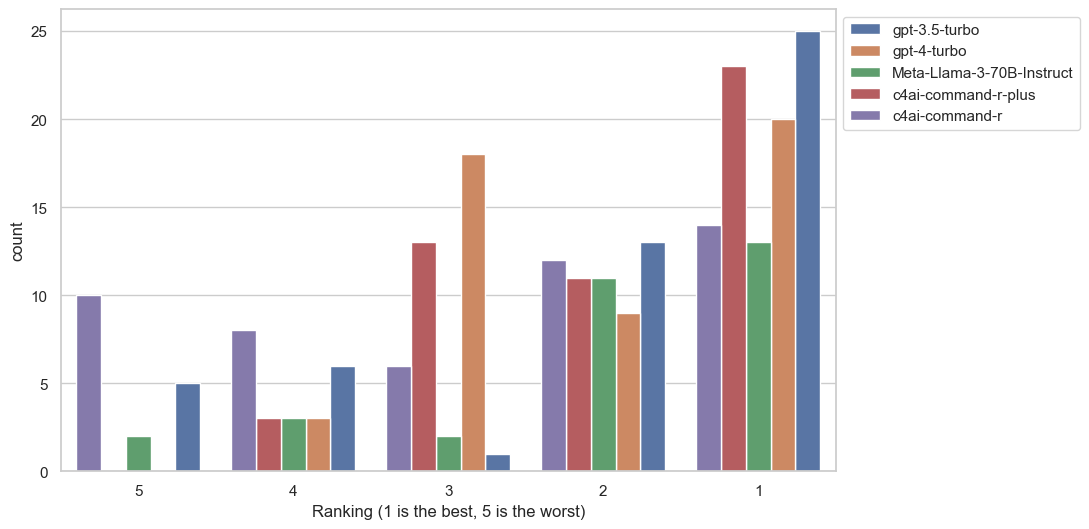

In [49]:
# plot the distribution of Ranking of the new instructions among models discretely, with ranking as x-axis and count as y-axis
# don't stack the bars but plot them side by side, don't rotate the x-axis labels, put the legend outside the plot, plot the bar chart with '/'
# remap the x-axis with integer values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
# plot the 5 on the left and 1 on the right
ax = sns.countplot(data=annotated, x='Ranking of the new instructions', hue='model', dodge=True)
ax.set_xticklabels([1, 2, 3, 4, 5])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# have the x label as 'Ranking, 1 is the best, 5 is the worst'
plt.xlabel("Ranking (1 is the best, 5 is the worst)")
plt.xlim(reversed(plt.xlim()))
plt.show()